## EOF Analysis

GOAL: find patterns of global warming within the different models using change in TAS


In [1]:
#imports
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from scipy import stats
import numpy as np
import pandas as pd
import xarray as xr
import zarr
from eofs import *
from eofs.standard import Eof
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
#open processed data
ds_tas_hist_ssp585 = xr.open_dataset('processed_tas_regional_ssp585_data.nc')
ds_tas_hist_ssp126 = xr.open_dataset('processed_tas_regional_ssp126_data.nc')
ds_tas_hist_ssp245 = xr.open_dataset('processed_tas_regional_ssp245_data.nc')

In [7]:
ds_tas_hist_ssp585

<xarray.Dataset>
Dimensions:  (lat: 175, lon: 358, model: 35)
Coordinates:
  * lat      (lat) int32 -87 -86 -85 -84 -83 -82 -81 ... 81 82 83 84 85 86 87
  * lon      (lon) int32 1 2 3 4 5 6 7 8 9 ... 351 352 353 354 355 356 357 358
  * model    (model) object 'GISS-E2-1-G' 'MIROC-ES2L' ... 'IPSL-CM6A-LR'
Data variables:
    tas      (model, lat, lon) float32 ...

In [4]:
ds_tas_hist_ssp126

<xarray.Dataset>
Dimensions:  (lat: 175, lon: 358, model: 31)
Coordinates:
  * lat      (lat) int32 -87 -86 -85 -84 -83 -82 -81 ... 81 82 83 84 85 86 87
  * lon      (lon) int32 1 2 3 4 5 6 7 8 9 ... 351 352 353 354 355 356 357 358
  * model    (model) object 'UKESM1-0-LL' 'CNRM-CM6-1-HR' ... 'IITM-ESM'
Data variables:
    tas      (model, lat, lon) float32 ...

In [5]:
#load data in separate variables
tas_ssp585 = ds_tas_hist_ssp585['tas'] 
models_ssp585 = ds_tas_hist_ssp585['model']
lat_ssp585 = ds_tas_hist_ssp585['lat']
lon_ssp585 = ds_tas_hist_ssp585['lon']

tas_ssp126 = ds_tas_hist_ssp126['tas']
models_ssp126 = ds_tas_hist_ssp126['model']
lat_ssp126 = ds_tas_hist_ssp126['lat']
lon_ssp126 = ds_tas_hist_ssp126['lon']

tas_ssp245 = ds_tas_hist_ssp245['tas']
models_ssp245 = ds_tas_hist_ssp245['model']
lat_ssp245 = ds_tas_hist_ssp245['lat']
lon_ssp245 = ds_tas_hist_ssp245['lon']

### Obtaining Leading EOF (not Variance)

In [93]:
#obtaining EOF as leading EOF (not variance) to check data
#get ssp585 leading EOF
#apply weights
coslat = np.cos(np.deg2rad(tas_ssp585.coords['lat'].values))
weights = np.sqrt(coslat)[...,np.newaxis]
#create solver 
solver_tas_ssp585 = Eof(tas_ssp585.values, weights = weights)
eof1_tas_ssp585 = solver_tas_ssp585.eofs(neofs=1)
pc1_tas_ssp585 = solver_tas_ssp585.pcs(npcs=1, pcscaling=1)

In [94]:
#get ssp126 leading EOF
#apply weights
coslat = np.cos(np.deg2rad(tas_ssp126.coords['lat'].values))
weights = np.sqrt(coslat)[...,np.newaxis]
#create solver 
solver_tas_ssp126 = Eof(tas_ssp126.values, weights = weights)
eof1_tas_ssp126 = solver_tas_ssp126.eofs(neofs=1)
pc1_tas_ssp126 = solver_tas_ssp126.pcs(npcs=1, pcscaling=1)

In [95]:
#get ssp245 leading EOF
#apply weights
coslat = np.cos(np.deg2rad(tas_ssp245.coords['lat'].values))
weights = np.sqrt(coslat)[...,np.newaxis]
#create solver 
solver_tas_ssp245 = Eof(tas_ssp245.values, weights = weights)
eof1_tas_ssp245 = solver_tas_ssp245.eofs(neofs=1)
pc1_tas_ssp245 = solver_tas_ssp245.pcs(npcs=1, pcscaling=1)

In [19]:
#convert the numpy array into a datarray for handling
eof1_tas_ssp585 = xr.DataArray(eof1_tas_ssp585, dims=["mode", "lat", "lon"], coords={"mode": [1], "lat": lat_ssp585, "lon": lon_ssp585})
eof1_tas_ssp126 = xr.DataArray(eof1_tas_ssp126, dims=["mode", "lat", "lon"], coords={"mode": [1], "lat": lat_ssp126, "lon": lon_ssp126})
eof1_tas_ssp245 = xr.DataArray(eof1_tas_ssp245, dims=["mode", "lat", "lon"], coords={"mode": [1], "lat": lat_ssp245, "lon": lon_ssp245})

In [20]:
#manipulate scaling to fit figures
eof1_tas_ssp585 = eof1_tas_ssp585 * -1
eof1_tas_ssp126 = eof1_tas_ssp126 * -1
eof1_tas_ssp245 = eof1_tas_ssp245 * -1

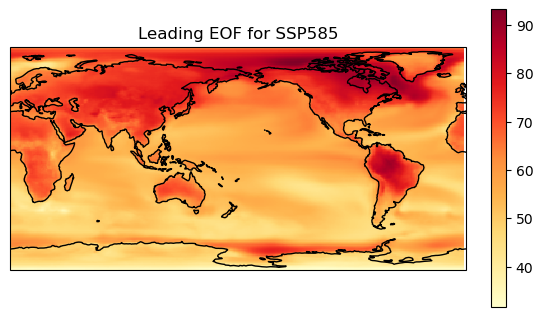

In [21]:
#plotting leading eof in Pacific domain for ssp585
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude = 180))
ax.coastlines()
img = eof1_tas_ssp585.plot(ax=ax, cmap = "YlOrRd", transform = ccrs.PlateCarree(), add_colorbar=False)
ax.set_title('Leading EOF for SSP585')
cbar = plt.colorbar(img, ax=ax, orientation='vertical', fraction=0.03, pad=0.05)

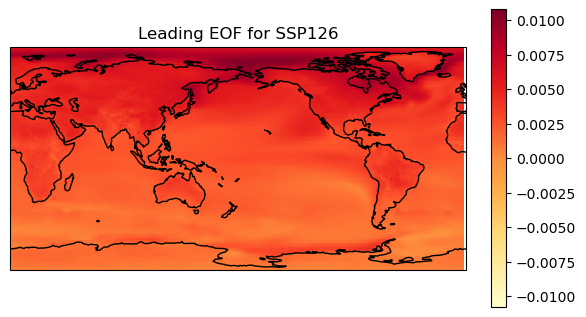

In [66]:
#plotting leading eof in Pacific domain for ssp126
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude = 180))
ax.coastlines()
img = eof1_tas_ssp126.plot(ax=ax, cmap = "YlOrRd", transform = ccrs.PlateCarree(), add_colorbar=False)
ax.set_title('Leading EOF for SSP126')
cbar = plt.colorbar(img, ax=ax, orientation='vertical', fraction=0.03, pad=0.05)

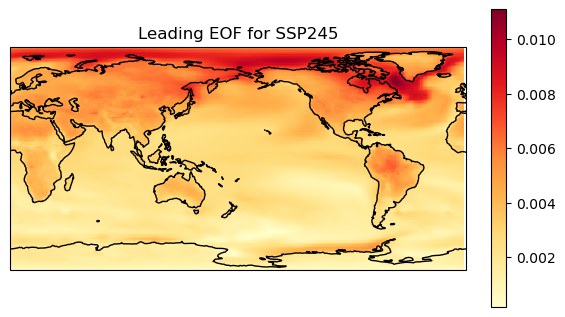

In [67]:
#plotting leading eof in Pacific domain for ssp245
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude = 180))
ax.coastlines()
img = eof1_tas_ssp245.plot(ax=ax, cmap = "YlOrRd", transform = ccrs.PlateCarree(), add_colorbar=False)
ax.set_title('Leading EOF for SSP245')
cbar = plt.colorbar(img, ax=ax, orientation='vertical', fraction=0.03, pad=0.05)

Note: We do not care about the scaling (or the signs) because of how the EOF package standardizes the data.

### Obtaining Variance of Local TAS Explained by Leading EOF

In [96]:
#get ssp585 leading EOF
#apply weights
coslat = np.cos(np.deg2rad(tas_ssp585.coords['lat'].values))
weights = np.sqrt(coslat)[...,np.newaxis]
#create solver 
solver_tas_ssp585 = Eof(tas_ssp585.values, weights = weights)
#get leading EOF as correlation between the leading PC time series and the input TAS anomalies at each grid pt
eof1_tas_ssp585 = solver_tas_ssp585.eofsAsCorrelation(neofs=1)
pc1_tas_ssp585 = solver_tas_ssp585.pcs(npcs=1, pcscaling=1)

In [97]:
#get ssp126 leading EOF
#apply weights
coslat = np.cos(np.deg2rad(tas_ssp126.coords['lat'].values))
weights = np.sqrt(coslat)[...,np.newaxis]
#create solver 
solver_tas_ssp126 = Eof(tas_ssp126.values, weights = weights)
#get leading EOF as correlation between the leading PC time series and the input TAS anomalies at each grid pt
eof1_tas_ssp126 = solver_tas_ssp126.eofsAsCorrelation(neofs=1)
pc1_tas_ssp126 = solver_tas_ssp126.pcs(npcs=1, pcscaling=1)

In [98]:
#get ssp245 leading EOF
#apply weights
coslat = np.cos(np.deg2rad(tas_ssp245.coords['lat'].values))
weights = np.sqrt(coslat)[...,np.newaxis]
#create solver 
solver_tas_ssp245 = Eof(tas_ssp245.values, weights = weights)
#get leading EOF as correlation between the leading PC time series and the input TAS anomalies at each grid pt
eof1_tas_ssp245 = solver_tas_ssp245.eofsAsCorrelation(neofs=1)
pc1_tas_ssp245 = solver_tas_ssp245.pcs(npcs=1, pcscaling=1)

In [99]:
#convert the numpy array into a datarray for handling
eof1_tas_ssp585 = xr.DataArray(eof1_tas_ssp585, dims=["mode", "lat", "lon"], coords={"mode": [1], "lat": lat_ssp585, "lon": lon_ssp585})
eof1_tas_ssp126 = xr.DataArray(eof1_tas_ssp126, dims=["mode", "lat", "lon"], coords={"mode": [1], "lat": lat_ssp126, "lon": lon_ssp126})
eof1_tas_ssp245 = xr.DataArray(eof1_tas_ssp245, dims=["mode", "lat", "lon"], coords={"mode": [1], "lat": lat_ssp245, "lon": lon_ssp245})

In [100]:
#Convert ssp585 values to R^2 percentage
eof1_tas_ssp585 = eof1_tas_ssp585*-1 #invert
eof1_tas_ssp585 = (eof1_tas_ssp585 ** 2) * 100

#Convert ssp126 values to R^2 percentage
eof1_tas_ssp126 = eof1_tas_ssp126*-1 #invert
eof1_tas_ssp126 = (eof1_tas_ssp126 ** 2) * 100

#Convert ssp245 values to R^2 percentage
eof1_tas_ssp245 = eof1_tas_ssp245*-1 #invert
eof1_tas_ssp245 = (eof1_tas_ssp245 ** 2) * 100

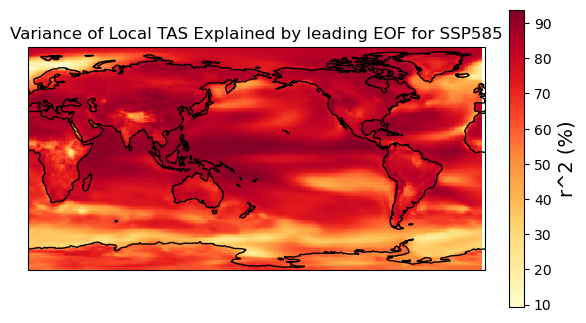

In [73]:
#plot the leading EOF expressed as correlation in the Pacific domain for ssp585
#this shows the variance with eof1_tas inverted -> squared 
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude = 180))
ax.coastlines()
img = eof1_tas_ssp585.plot(ax=ax, cmap = "YlOrRd", transform = ccrs.PlateCarree(), add_colorbar=False)
ax.set_title('Variance of Local TAS Explained by leading EOF for SSP585')
cbar = plt.colorbar(img, ax=ax, orientation='vertical', fraction=0.03, pad=0.05)
cbar.set_label('r^2 (%)', fontsize=14)

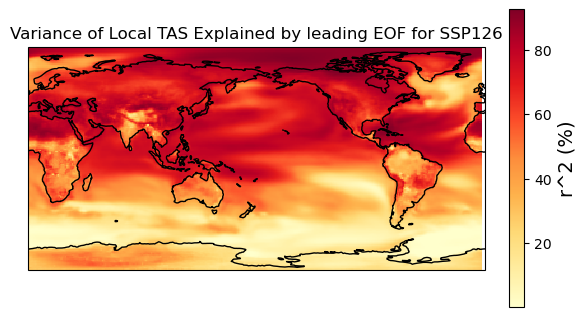

In [74]:
#plot the leading EOF expressed as correlation in the Pacific domain for ssp126
#this shows the variance with eof1_tas inverted -> squared 
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude = 180))
ax.coastlines()
img = eof1_tas_ssp126.plot(ax=ax, cmap = "YlOrRd", transform = ccrs.PlateCarree(), add_colorbar=False)
ax.set_title('Variance of Local TAS Explained by leading EOF for SSP126')
cbar = plt.colorbar(img, ax=ax, orientation='vertical', fraction=0.03, pad=0.05)
cbar.set_label('r^2 (%)', fontsize=14)

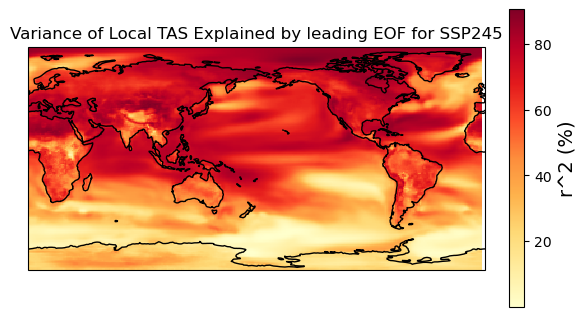

In [76]:
#plot the leading EOF expressed as correlation in the Pacific domain for ssp245
#this shows the variance with eof1_tas inverted -> squared 
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude = 180))
ax.coastlines()
img = eof1_tas_ssp245.plot(ax=ax, cmap = "YlOrRd", transform = ccrs.PlateCarree(), add_colorbar=False)
ax.set_title('Variance of Local TAS Explained by leading EOF for SSP245')
cbar = plt.colorbar(img, ax=ax, orientation='vertical', fraction=0.03, pad=0.05)
cbar.set_label('r^2 (%)', fontsize=14)

In [9]:
############# WITHOUT THE WEIGHTS #################

In [19]:
solver_tas_ssp585_NW = Eof(tas_ssp585.values)
eof1_tas_ssp585_NW = solver_tas_ssp585.eofsAsCorrelation(neofs=1)
pc10_tas_ssp585_NW = solver_tas_ssp585.pcs(npcs=1, pcscaling=1)

In [20]:
eof1_tas_ssp585_NW = xr.DataArray(eof1_tas_ssp585_NW, dims=["mode", "lat", "lon"], coords={"mode": [1], "lat": lat_ssp585, "lon": lon_ssp585})
eof1_tas_ssp585_NW = eof1_tas_ssp585_NW*-1 #invert
eof1_tas_ssp585_NW = (eof1_tas_ssp585_NW ** 2) * 100
eof1_tas_ssp585_NW

<xarray.DataArray (mode: 1, lat: 175, lon: 358)>
array([[[        nan, 57.76308798, 58.06190925, ..., 56.20974876,
                 nan,         nan],
        [        nan, 57.68416984, 57.73863656, ..., 57.10925229,
                 nan,         nan],
        [        nan, 55.68472506, 55.89094913, ..., 56.31633633,
                 nan,         nan],
        ...,
        [        nan, 83.38833686, 83.00351076, ..., 84.3209421 ,
                 nan,         nan],
        [        nan, 83.00391569, 82.8107392 , ..., 83.5768788 ,
                 nan,         nan],
        [        nan, 82.50631104, 82.46416595, ..., 82.74090875,
                 nan,         nan]]])
Coordinates:
  * mode     (mode) int32 1
  * lat      (lat) int32 -87 -86 -85 -84 -83 -82 -81 ... 81 82 83 84 85 86 87
  * lon      (lon) int32 1 2 3 4 5 6 7 8 9 ... 351 352 353 354 355 356 357 358

In [25]:
diff = (eof1_tas_ssp585 - eof1_tas_ssp585_NW).values.flatten()
np.unique(diff)

array([ 0., nan])

### Creating EOF Plot that Compares Variance Explained

In [6]:
#now, get multiple EOFS by increasing the number we want in our parameters
#get ssp585 EOFs
coslat = np.cos(np.deg2rad(tas_ssp585.coords['lat'].values))
weights = np.sqrt(coslat)[...,np.newaxis]
#create solver 
solver_tas_ssp585 = Eof(tas_ssp585.values, weights = weights)
eof10_tas_ssp585 = solver_tas_ssp585.eofsAsCorrelation(neofs=10)
pc10_tas_ssp585 = solver_tas_ssp585.pcs(npcs=10, pcscaling=1)

In [7]:
#get ssp126 EOFs
coslat = np.cos(np.deg2rad(tas_ssp126.coords['lat'].values))
weights = np.sqrt(coslat)[...,np.newaxis]
#create solver 
solver_tas_ssp126 = Eof(tas_ssp126.values, weights=weights)
eof10_tas_ssp126 = solver_tas_ssp126.eofsAsCorrelation(neofs=10)
pc10_tas_ssp126 = solver_tas_ssp126.pcs(npcs=10, pcscaling=1)

In [51]:
#get ssp245 EOfs
coslat = np.cos(np.deg2rad(tas_ssp245.coords['lat'].values))
weights = np.sqrt(coslat)[...,np.newaxis]
#create solver 
solver_tas_ssp245 = Eof(tas_ssp245.values, weights = weights)
eof10_tas_ssp245 = solver_tas_ssp245.eofsAsCorrelation(neofs=10)
pc10_tas_ssp245 = solver_tas_ssp245.pcs(npcs=10, pcscaling=1)

In [52]:
pc10_tas_ssp245

array([[-1.83886553e+00, -1.01614810e+00,  6.58249334e-01,
        -2.51114832e+00,  3.10163291e-01, -4.93335155e-01,
         6.67084163e-01, -7.36359355e-01,  1.78316254e+00,
        -4.52879384e-01],
       [ 1.01667623e+00,  2.96039922e-01, -1.54808719e+00,
        -4.06374833e-01,  3.22654166e-01,  1.66201616e+00,
        -7.37079542e-02, -4.05609641e-01,  1.90210857e+00,
        -9.42573686e-01],
       [ 3.15662573e-01,  1.45968961e+00,  6.90481217e-01,
         2.40890162e-01, -7.25565965e-01,  2.08032037e+00,
         8.72836735e-01,  2.76752872e+00,  1.49179951e+00,
        -1.91997642e+00],
       [-5.69649810e-01,  2.36205798e+00,  2.09878652e+00,
         1.26132585e-03,  6.01207924e-01,  1.00907382e+00,
         4.22093201e-01,  9.59036529e-01,  6.35835444e-01,
         1.69063306e+00],
       [ 1.55555765e-01,  1.97369148e+00, -1.42944893e+00,
        -3.11752177e-01,  1.55422871e-01,  7.33959008e-01,
        -3.80251130e-01, -1.58227018e+00, -9.78034958e-01,
        -8.

In [9]:
#convert the numpy array into a datarray for handling
eof10_tas_ssp585 = xr.DataArray(eof10_tas_ssp585, dims=["mode", "lat", "lon"], coords={"mode": [1,2,3,4,5,6,7,8,9,10], "lat": lat_ssp585, "lon": lon_ssp585})
eof10_tas_ssp126 = xr.DataArray(eof10_tas_ssp126, dims=["mode", "lat", "lon"], coords={"mode": [1,2,3,4,5,6,7,8,9,10], "lat": lat_ssp126, "lon": lon_ssp126})
eof10_tas_ssp245 = xr.DataArray(eof10_tas_ssp245, dims=["mode", "lat", "lon"], coords={"mode": [1,2,3,4,5,6,7,8,9,10], "lat": lat_ssp245, "lon": lon_ssp245})

In [10]:
#convert each mode's values to R^2
#Convert ssp585 values to R^2 percentage
converted_tas_ssp585_data = []
for mode_value in eof10_tas_ssp585['mode']:
    mode_data = eof10_tas_ssp585.sel(mode=mode_value)
    mode_data = ((mode_data*-1)**2)*100 #i need to overwrite the actual mode values from eof10_tas_ssp585, or i can just make a separate dataarray
    converted_tas_ssp585_data.append(mode_data)
#converted_tas_ssp585_data

#convert ssp126 data to R^2 percentage
converted_tas_ssp126_data = []
for mode_value in eof10_tas_ssp126['mode']:
    mode_data = eof10_tas_ssp126.sel(mode=mode_value)
    mode_data = ((mode_data*-1)**2)*100 
    converted_tas_ssp126_data.append(mode_data)
#converted_tas_ssp126_data

#convert ssp126 data to R^2 percentage
converted_tas_ssp245_data = []
for mode_value in eof10_tas_ssp245['mode']:
    mode_data = eof10_tas_ssp245.sel(mode=mode_value)
    mode_data = ((mode_data*-1)**2)*100 
    converted_tas_ssp245_data.append(mode_data)
#converted_tas_ssp245_data

In [11]:
#take the mean of each mode for ssp585 data
mean_var_ssp585_values = []
for i in range(10):
    mean_var = np.mean(converted_tas_ssp585_data[i])
    mean_var_ssp585_values.append(mean_var)
    
#take the mean of each mode for ssp126 data
mean_var_ssp126_values = []
for i in range(10):
    mean_var = np.mean(converted_tas_ssp126_data[i])
    mean_var_ssp126_values.append(mean_var)

mean_var_ssp245_values = []
for i in range(10):
    mean_var = np.mean(converted_tas_ssp245_data[i])
    mean_var_ssp245_values.append(mean_var)

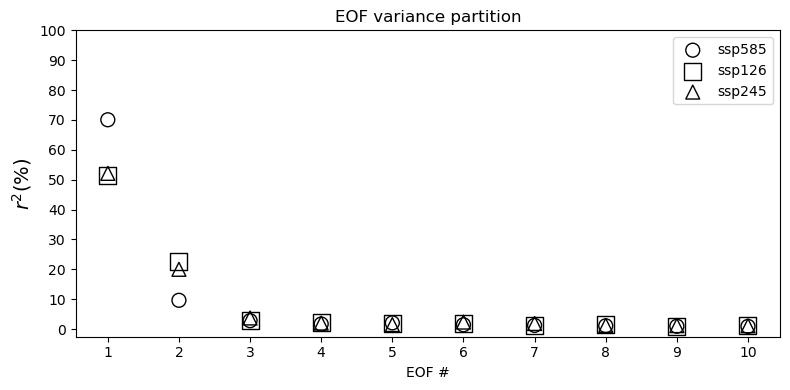

In [113]:
#make plot for eof partition variance
fig, ax = plt.subplots(figsize = (8,4))
eof10_ssp585 = plt.scatter(eof10_tas_ssp585['mode'], mean_var_ssp585_values, color='none', edgecolor='black', marker='o',
                           s=100, label = 'ssp585')
eof10_ssp126 = plt.scatter(eof10_tas_ssp126['mode'], mean_var_ssp126_values, color='none', edgecolor='black', marker='s', 
                           s=150, label = 'ssp126')
eof10_ssp245 = plt.scatter(eof10_tas_ssp245['mode'], mean_var_ssp245_values, color='none', edgecolor='black', marker='^', 
                           s=100, label = 'ssp245')
plt.xticks(eof10_tas_ssp585['mode']); plt.yticks(range(0, 101, 10)); ax.legend(handles = [eof10_ssp585, eof10_ssp126, eof10_ssp245]);
plt.xlabel('EOF #'); plt.ylabel(r'$r^2 (\%)$', fontsize=14); plt.title('EOF variance partition')
plt.tight_layout()

### ECS & PC Correlation 

#### Correlation using correlation matrix

In [18]:
#I need to create a manageable way to get the ECS for corresponding PCs
#easier to iterate/go through preprocessing process but in a smaller scale w ECS
#would use a for loop to go through the r1i1p1f1 and manually select the ECS 
#PROBLEM: need to create a dataset (i could do that manually but that's not very reproducible)

In [23]:
#read the file
with open('CMIP6_ECS_ERF_fbks.txt', 'r') as file:
    content = file.readlines()

#takes each line and only selects content that does not have ------- formatting
content = [line.strip() for line in content if line.strip() and not line.startswith("------")]

#splits content by whitespace and stores it in a list
data = []
for line in content:
    #split by white space using line.split
    data.append(line.split())

#convert the list to a dataframe
columns = ["model", "VARIANT", "ECS", "ERF2x", "PL", "PL*", "LR", "LR*", "WV", "RH", "ALB", "CLD", "SWCLD", "LWCLD", "NET", "ERR"]
ECS_df = pd.DataFrame(data, columns=columns)

#save the df as a csv file
ECS_csv = ECS_df.to_csv('CMIP6_ECS.csv', index=False)

ECS_df = ECS_df.iloc[5:-2].reset_index(drop=True)

In [24]:
ECS_df

,model,VARIANT,ECS,ERF2x,PL,PL*,LR,LR*,WV,RH,ALB,CLD,SWCLD,LWCLD,NET,ERR
0,ACCESS-CM2,r1i1p1f1,4.66,3.43,-3.29,-1.91,-0.47,-0.05,1.72,-0.07,0.39,0.76,0.96,-0.20,-0.74,0.15
1,ACCESS-ESM1-5,r1i1p1f1,3.88,2.83,-3.27,-1.91,-0.30,0.02,1.70,0.02,0.46,0.56,0.43,0.13,-0.73,0.12
2,AWI-CM-1-1-MR,r1i1p1f1,3.16,3.63,-3.23,-1.88,-0.41,-0.03,1.77,0.03,0.46,0.22,-0.31,0.53,-1.15,0.04
3,BCC-CSM2-MR,r1i1p1f1,3.02,3.11,-3.31,-1.95,-0.36,0.01,1.67,-0.07,0.43,0.51,0.16,0.35,-1.03,0.04
4,BCC-ESM1,r1i1p1f1,3.25,3.01,-3.29,-1.94,-0.35,0.01,1.66,-0.05,0.47,0.52,0.02,0.50,-0.92,0.07
5,CAMS-CSM1-0,r1i1p1f1,2.29,4.17,-3.31,-1.91,-0.62,-0.05,2.01,0.05,0.26,-0.36,-0.72,0.36,-1.82,0.19
6,CESM2,r1i1p1f1,5.15,3.27,-3.34,-1.93,-0.53,-0.08,1.87,0.00,0.40,0.96,0.79,0.17,-0.63,0.01
7,CESM2-FV2,r1i1p1f1,5.16,2.86,-3.30,-1.92,-0.51,-0.07,1.74,-0.07,0.43,1.06,0.95,0.11,-0.55,0.03
8,CESM2-WACCM,r1i1p1f1,4.68,3.30,-3.34,-1.94,-0.54,-0.07,1.86,-0.01,0.40,1.17,1.05,0.12,-0.71,-0.25
9,CESM2-WACCM-FV2,r1i1p1f1,4.80,2.92,-3.31,-1.93,-0.52,-0.07,1.75,-0.09,0.41,1.13,0.97,0.15,-0.61,-0.06


In [25]:
ECS_df['VARIANT'].unique()

array(['r1i1p1f1', 'r1i1p1f2', 'r8i1p1f1', 'r1i1p1f3'], dtype=object)

##### SSP 585

In [26]:
#so i would have to find the interaction of the models between ecs_df and the tas one that I had 
models_ssp585  = set(ds_tas_hist_ssp585['model'].values)    # all models that have temperature in the historical simulations
models_ECS =set(ECS_df.model)  # all models that have temperature in the ssp585     simulations

# let's only keep the models that have all the runs (the intersection of the set)
source_set_model = set.intersection(models_ssp585, models_ECS)
source_set_model
#print(len(source_set_model))

{'ACCESS-CM2',
 'ACCESS-ESM1-5',
 'BCC-CSM2-MR',
 'CAMS-CSM1-0',
 'CESM2',
 'CESM2-WACCM',
 'CIESM',
 'CMCC-CM2-SR5',
 'CMCC-ESM2',
 'CNRM-CM6-1-HR',
 'EC-Earth3-CC',
 'EC-Earth3-Veg',
 'EC-Earth3-Veg-LR',
 'FGOALS-f3-L',
 'FGOALS-g3',
 'GFDL-CM4',
 'GFDL-ESM4',
 'GISS-E2-1-G',
 'GISS-E2-1-H',
 'HadGEM3-GC31-LL',
 'HadGEM3-GC31-MM',
 'IITM-ESM',
 'INM-CM4-8',
 'INM-CM5-0',
 'IPSL-CM6A-LR',
 'KACE-1-0-G',
 'MIROC-ES2L',
 'MIROC6',
 'MPI-ESM1-2-HR',
 'MRI-ESM2-0',
 'NESM3',
 'NorESM2-LM',
 'NorESM2-MM',
 'TaiESM1',
 'UKESM1-0-LL'}

In [27]:
ECS_df = ECS_df[ECS_df['model'].isin(source_set_model)].reset_index()
ECS_df = ECS_df[['model', 'ECS']]
ECS_df

,model,ECS
0,ACCESS-CM2,4.66
1,ACCESS-ESM1-5,3.88
2,BCC-CSM2-MR,3.02
3,CAMS-CSM1-0,2.29
4,CESM2,5.15
5,CESM2-WACCM,4.68
6,CIESM,5.63
7,CMCC-CM2-SR5,3.55
8,CMCC-ESM2,3.58
9,CNRM-CM6-1-HR,4.33


In [36]:
#i have to make a new xarray dataset that combines the tas values 
#and the ECS for the corresponding model 

ecs_values_ssp585 = ECS_df['ECS'].values
ecs_values_ssp585 = ecs_values_ssp585.astype(float)
ecs_values_ssp585

array([4.66, 3.88, 3.02, 2.29, 5.15, 4.68, 5.63, 3.55, 3.58, 4.33, 4.23,
       4.33, 4.23, 2.98, 2.87, 3.89, 2.65, 2.71, 3.12, 5.55, 5.44, 2.37,
       1.83, 1.92, 4.7 , 4.75, 2.66, 2.6 , 2.98, 3.13, 4.76, 2.56, 2.49,
       4.36, 5.36])

In [37]:
pc10_tas_ssp585.shape

(35, 10)

In [50]:
pc10_tas_ssp585

array([[-8.59147293e-01,  8.06312538e-01,  1.08543726e+00,
        -1.10918596e+00,  9.11954098e-01, -2.18944227e+00,
         5.38364358e-01, -8.53225887e-01,  5.90422145e-01,
        -1.42513566e+00],
       [-5.64010558e-01, -1.44795260e+00,  3.70633379e-01,
         8.56731576e-03, -3.62425439e-01, -2.84041138e-01,
        -9.13667239e-01,  2.03185572e-01,  4.86183997e-01,
         3.24957856e-01],
       [-4.43260231e-01,  1.07316973e+00, -2.33220692e-01,
        -2.19035776e-01,  8.37363645e-01, -2.77141303e+00,
         2.92043484e-01,  5.09615317e-01,  9.92597714e-01,
         1.73438708e-01],
       [ 6.24191687e-01,  2.10288404e+00, -1.76353863e+00,
        -8.48153477e-02,  2.12266073e+00,  1.09563453e-01,
        -3.58373763e-01, -1.06460016e+00, -3.71397536e-01,
         1.61576119e+00],
       [ 2.18526776e+00, -1.06064421e+00,  1.98193865e-01,
        -5.81802496e-01, -5.18014487e-02,  6.37156811e-01,
         1.50294525e-01,  6.85596386e-01,  1.38386312e+00,
         4.

In [56]:
corr_ecs_pcs = []
print(np.shape((ecs_values_ssp585)))
for pc in range(10):
    pc_values_column = pc10_tas_ssp585[:, pc]
    #compute the correlation between ECS values and the current principal component for all models
    corr = np.corrcoef(ecs_values_ssp585, pc_values_column)[0, 1]
    corr_ecs_pcs.append(abs(corr))

(35,)


In [49]:
#corr_ecs_pcs = np.square(corr_ecs_pcs) * 100
corr_ecs_pcs

[0.2784455888026362,
 0.033437798287208324,
 0.04357148731084089,
 0.16063402837484933,
 0.2703925705520118,
 0.007509351376328757,
 0.004928596670564708,
 0.05260611095103273,
 0.03257740250844511,
 0.024535155410288844]

In [46]:
#can just use the index of the correlation list as PC # and then change axis label
#have y-scale be ECS, PROBLEM: do we need to have it be the corresponding ECS to the ? thats hard bc we have mult ecs values 

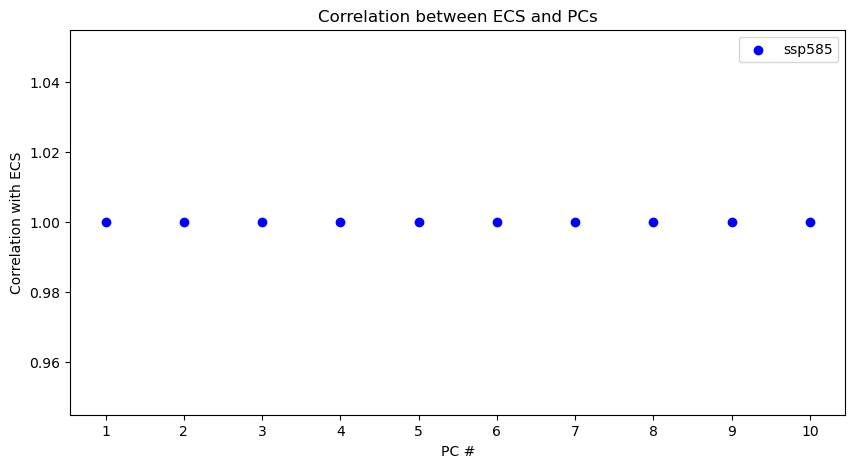

In [47]:
#hard to create data-array format for PCs so just create list of numbers for plotting purposes
pc_numbers = np.arange(1,11,1)
plt.figure(figsize=(10,5))
plt.scatter(pc_numbers, corr_ecs_pcs, color = 'blue', marker = 'o', label = 'ssp585' )
plt.xlabel('PC #')
plt.ylabel('Correlation with ECS')
plt.title('Correlation between ECS and PCs') 
plt.xticks(ticks=range(1, 11)); plt.legend();

##### SSP 126

In [15]:
models_ssp126  = set(ds_tas_hist_ssp126['model'].values)
models_ECS =set(ECS_df.model)

# let's only keep the models that have all the runs (the intersection of the set)
source_set_model_2 = set.intersection(models_ssp126, models_ECS)
source_set_model_2
print(len(source_set_model_2))

30


In [16]:
source_set_model_2

{'ACCESS-CM2',
 'ACCESS-ESM1-5',
 'BCC-CSM2-MR',
 'CAMS-CSM1-0',
 'CESM2-WACCM',
 'CIESM',
 'CMCC-CM2-SR5',
 'CMCC-ESM2',
 'CNRM-CM6-1',
 'CNRM-CM6-1-HR',
 'CNRM-ESM2-1',
 'CanESM5',
 'EC-Earth3-Veg',
 'EC-Earth3-Veg-LR',
 'FGOALS-f3-L',
 'FGOALS-g3',
 'GFDL-ESM4',
 'HadGEM3-GC31-LL',
 'HadGEM3-GC31-MM',
 'IITM-ESM',
 'INM-CM4-8',
 'INM-CM5-0',
 'IPSL-CM6A-LR',
 'KACE-1-0-G',
 'MIROC-ES2L',
 'MIROC6',
 'MRI-ESM2-0',
 'NESM3',
 'TaiESM1',
 'UKESM1-0-LL'}

In [17]:
ECS_df_ssp126 = ECS_df[ECS_df['model'].isin(source_set_model_2)].reset_index()
ECS_df_ssp126 = ECS_df_ssp126[['model', 'ECS']]
ECS_df_ssp126

,model,ECS
0,ACCESS-CM2,4.66
1,ACCESS-ESM1-5,3.88
2,BCC-CSM2-MR,3.02
3,CAMS-CSM1-0,2.29
4,CESM2-WACCM,4.68
5,CIESM,5.63
6,CMCC-CM2-SR5,3.55
7,CMCC-ESM2,3.58
8,CNRM-CM6-1,4.90
9,CNRM-CM6-1-HR,4.33


In [18]:
ecs_values_ssp126 = ECS_df_ssp126['ECS'].values
ecs_values_ssp126 = ecs_values_ssp126.astype(float)
ecs_values_ssp126

array([4.66, 3.88, 3.02, 2.29, 4.68, 5.63, 3.55, 3.58, 4.9 , 4.33, 4.79,
       5.64, 4.33, 4.23, 2.98, 2.87, 2.65, 5.55, 5.44, 2.37, 1.83, 1.92,
       4.7 , 4.75, 2.66, 2.6 , 3.13, 4.76, 4.36, 5.36])

In [19]:
pc10_tas_ssp126.shape

(31, 10)

In [20]:
corr_ecs_pcs = []
for pc in range(10):
    pc_values_column = pc10_tas_ssp126[:, pc]
    #compute the correlation between ECS values and the current principal component for all models
    corr = np.corrcoef(ecs_values_ssp126, pc_values_column)[0, 1]
    corr_ecs_pcs.append(abs(corr))

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 30 and the array at index 1 has size 31

### NOTE: PC only has .pc function

In [51]:
#now, get multiple EOFS by increasing the number we want in our parameters
#get ssp585 EOFs
coslat = np.cos(np.deg2rad(tas_ssp585.coords['lat'].values))
weights = np.sqrt(coslat)[...,np.newaxis]
#create solver 
solver_tas_ssp585 = Eof(tas_ssp585.values, weights = weights)
eof10_tas_ssp585 = solver_tas_ssp585.eofsAsCovariance(neofs=10)
pc10_tas_ssp585 = solver_tas_ssp585.pcs(npcs=10, pcscaling=1)

In [52]:
#get ssp126 EOFs
coslat = np.cos(np.deg2rad(tas_ssp126.coords['lat'].values))
weights = np.sqrt(coslat)[...,np.newaxis]
#create solver 
solver_tas_ssp126 = Eof(tas_ssp126.values, weights=weights)
eof10_tas_ssp126 = solver_tas_ssp126.eofsAsCovariance(neofs=10)
pc10_tas_ssp126 = solver_tas_ssp126.pcs(npcs=10, pcscaling=1)

In [53]:
#get ssp245 EOfs
coslat = np.cos(np.deg2rad(tas_ssp245.coords['lat'].values))
weights = np.sqrt(coslat)[...,np.newaxis]
#create solver 
solver_tas_ssp245 = Eof(tas_ssp245.values, weights = weights)
eof10_tas_ssp245 = solver_tas_ssp245.eofsAsCovariance(neofs=10)
pc10_tas_ssp245 = solver_tas_ssp245.pcs(npcs=10, pcscaling=1)

In [54]:
corr_ecs_pcs = []
for pc in range(10):
    pc_values_column = pc10_tas_ssp585[:, pc]
    #compute the correlation between ECS values and the current principal component for all models
    corr = np.corrcoef(ecs_values_ssp585, pc_values_column)[0, 1]
    corr_ecs_pcs.append(abs(corr))

In [55]:
corr_ecs_pcs = np.square(corr_ecs_pcs) * 100
corr_ecs_pcs

array([7.75319459e+00, 1.11808635e-01, 1.89847451e-01, 2.58032911e+00,
       7.31121422e+00, 5.63903581e-03, 2.42910651e-03, 2.76740291e-01,
       1.06128715e-01, 6.01973851e-02])

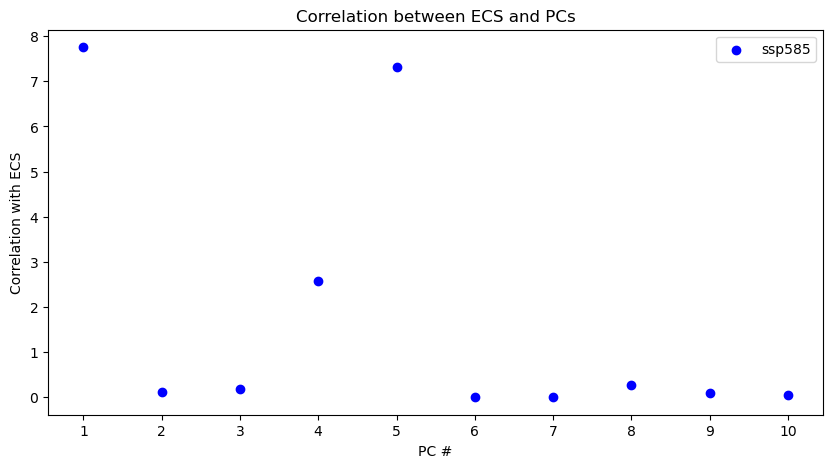

In [56]:
#hard to create data-array format for PCs so just create list of numbers for plotting purposes
pc_numbers = np.arange(1,11,1)
plt.figure(figsize=(10,5))
plt.scatter(pc_numbers, corr_ecs_pcs, color = 'blue', marker = 'o', label = 'ssp585' )
plt.xlabel('PC #')
plt.ylabel('Correlation with ECS')
plt.title('Correlation between ECS and PCs') 
plt.xticks(ticks=range(1, 11)); plt.legend();